<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/Creditcard_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Objective: The objective of the problem is to predict the next month default. Here the aproach will be to perform a data analysis to identify the features who palys an important role in the prediction.
The typical steps will 
1. Data Cleaning 

2. Data Preparation 

3. Final analysis or model building 


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [38]:
import pandas as pd

dataset=pd.read_csv("/content/drive/MyDrive/machine_learning/UCI_Credit_Card.csv")

In [39]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Below is the description of the dataset:

**ID: **ID of each client
**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit
**SEX:** Gender (1=male, 2=female)
**EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
**MARRIAGE:** Marital status (1=married, 2=single, 3=others)
**AGE:** Age in years
**PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
**PAY_2: **Repayment status in August, 2005 (scale same as above)
**PAY_3:** Repayment status in July, 2005 (scale same as above)
**PAY_4:** Repayment status in June, 2005 (scale same as above)
**PAY_5:** Repayment status in May, 2005 (scale same as above)
**PAY_6:** Repayment status in April, 2005 (scale same as above)
**BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)
**BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)
**BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)
**BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)
**BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)
**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)
**PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)
**PAY_AMT2: **Amount of previous payment in August, 2005 (NT dollar)
**PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)
**PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)
**PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)
**PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)
**default.payment.next.month:** Default payment (1=yes, 0=no)

**Data Preperation:**

Let us understand each features of the dataset



In [40]:
dataset.shape

(30000, 25)

The dataset is consist of 30,000 data points and 25 dimention

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

We don't have any null values. In this case, we can see that id does not play an important role is making the prediction. We are going to drop the ID feature.

We will also rename features: Pay_0 to Pay_1

In [42]:
# Renaming default.payment.next.month as default_status
dataset.rename(columns={'default.payment.next.month':'default_status'},inplace='True')


In [43]:
# Renaming the PAY_0 to PAY_1
dataset.rename(columns={'PAY_0':'PAY_1'},inplace='True')

In [44]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [45]:
dataset.isna().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
default_status    0
dtype: int64

# DATA Preparation : In this stage, we will transform the categorical features into numerical features.

Checking the distribution of classes. 

In [46]:
dataset['default_status'].value_counts()

0    23364
1     6636
Name: default_status, dtype: int64

We are found that the data set is severly imbalanced. Based on this distribution of the data points. We can adopt to different strategies

1. Up Sampling 
2. Positioning this problem as outlier detection problem so that we can use algorithims like LOF and or isolationforest algorithims. In LOF, the major factor is local reachability density and local reachabilty density(lrd) is nothing but inverse of avaerage reachability of any point(for say xi) from its neighor and finally the LOF is average local researability of points in the neibhorhood of xi multiplied by 1/local reachability of xi.
Hence the impact of imbalance dataset is reduced.

In [47]:
dataset['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

We have two categories 1 and 2. A this variable has two varaible, we don't need to converrt them using one hot encoding because binary values will be understood by the model and it will not consider the ordinality of the data.

In [48]:
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

This feature has some ordinality but as 4=others, 5=unknown, 6=unknown represents different categories and ordinality can cause issues for the model. We will convert this features into onehot encoded variable.

In [49]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

This feature also needs to be encoded with onehot encoding as marraige status can't be ordinal.

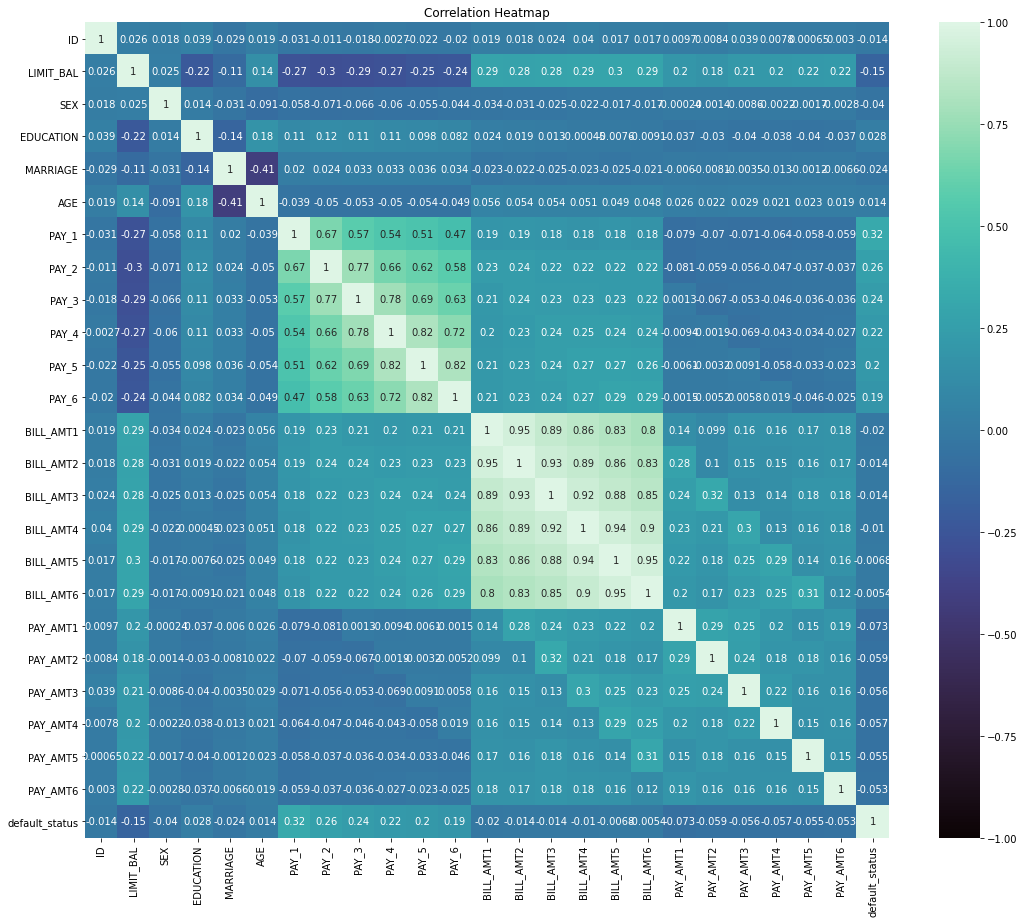

In [50]:
# We will have look into the co-relation to see if some features are important or not 

corr= dataset.corr()


plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

We don't see much of the relation between features. There are some negetive co-relation between Age and marraige but that is due to ordinality of the marraige feature.

# we are listing all unique values of each columns:
    We need to convert Marraige and education into one hot encoded features

# Preprocessing :

In [51]:
# We will write a function to perform One hot-encoding 

def one_hot_encoding(df,columns_dict):
  df=df.copy()

  for columns, prefix in columns_dict.items():
    encoded_df=pd.get_dummies(df[columns],prefix=prefix)
    df=pd.concat([df,encoded_df],axis=1)
    df=df.drop(columns,axis=1)

  return df


In [52]:
def preprocessing_data(df):

# Making a copy of the dataset 
  df=df.copy()
# droping id 
  df=df.drop('ID',axis=1)

  df=one_hot_encoding(df,{ 'MARRIAGE':'MAR','EDUCATION':'EDU'})


  y = df['default_status'].copy()

  x = df.drop('default_status',axis=1).copy()

  # scaler = StandardScaler()
  # x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

  return x,y
  


In [53]:
x,y = preprocessing_data(dataset)

In [54]:
{columns:len(x[columns].unique()) for columns in x.columns}

{'AGE': 56,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'EDU_0': 2,
 'EDU_1': 2,
 'EDU_2': 2,
 'EDU_3': 2,
 'EDU_4': 2,
 'EDU_5': 2,
 'EDU_6': 2,
 'LIMIT_BAL': 81,
 'MAR_0': 2,
 'MAR_1': 2,
 'MAR_2': 2,
 'MAR_3': 2,
 'PAY_1': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'SEX': 2}

In [55]:
print(type(x.values))

<class 'numpy.ndarray'>


In [56]:
x

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MAR_0,MAR_1,MAR_2,MAR_3,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,1,0,0,0,0,0,1,0,0,0
29996,150000.0,1,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0
29997,30000.0,1,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,0,0,1,0,0,0,1,0,0,0,0
29998,80000.0,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,0,1,0,0,0,0,0,1,0,0,0


ID feature is removed

In [57]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_status, Length: 30000, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

# Training :

1.1 Training a Classification models

1.2 Local outlier Factor



1.1 Training Classification Model

In [59]:
models={ LogisticRegression(penalty='l1',solver='saga'): "Logistic Regression", SVC() : "Support Vector Machine", RandomForestClassifier(): "Random Forest Classifier" }

for model in models.keys():
  model.fit(x_train,y_train)
  



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [28]:
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

Logistic Regression: 77.72%
Support Vector Machine: 77.72%
Random Forest Classifier: 81.37%


# 1.2 Outlier Detection Algorithims :

In this section, we are going to apply outlier detection tecniques to indentify the fraud transaction. We will use local Outlier function and Isolation Forest techniques to perform the anomaly detection.

In [29]:
# Print x and y for reference 
x.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MAR_0,MAR_1,MAR_2,MAR_3,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,0,0,1,0,0,0,0


In [30]:
# viewing the target variables 
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_status, dtype: int64

In [31]:
# spliting the datas into defaulter class and normal
defaulter=dataset[dataset['default_status']==1]
print(defaulter.shape)
normal=dataset[dataset['default_status']==0]
print(normal.shape)

(6636, 25)
(23364, 25)


In [32]:
#Calculating the defaulter fraction 
default_fraction=len(defaulter)/float(len(normal))

print(default_fraction)

0.2840267077555213


In [33]:
# Creating a random state 
state=np.random.RandomState(42)

In [60]:
# Importing IsolationForest and LocalOutlierFactor from sklearn
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(x), 
                                       contamination=default_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=15, metric='minkowski',
                                              p=2, metric_params=None, contamination=default_fraction),
    
   
}

In [61]:
from sklearn.metrics import classification_report,accuracy_score
n_outliers = len(defaulter)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_prediction = clf.negative_outlier_factor_
    
    else:    
        clf.fit(x)
        scores_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))


Isolation Forest: 9815
Accuracy Score :
0.6728333333333333
Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.75      0.78     23364
           1       0.31      0.40      0.35      6636

    accuracy                           0.67     30000
   macro avg       0.56      0.58      0.57     30000
weighted avg       0.70      0.67      0.69     30000

Local Outlier Factor: 11749
Accuracy Score :
0.6083666666666666
Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     23364
           1       0.20      0.26      0.22      6636

    accuracy                           0.61     30000
   macro avg       0.49      0.48      0.48     30000
weighted avg       0.64      0.61      0.62     30000

